<a href="https://colab.research.google.com/github/Yogi-1999/Domain-Name-Value-Prediction-Systems/blob/main/Domain_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train = pd.read_csv('drive/My Drive/Colab Notebooks/coursework_data.csv')
train.head()

,Domain,category
0,noriomatsumoto.com,1
1,haplessmales.com,1
2,shivamchatuvedi.com,1
3,dailyfreebieoffer.com,1
4,poniemall.com,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Domain    10000 non-null  object
 1   category  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [6]:
train.columns

Index(['Domain', 'category'], dtype='object')

In [7]:
train.dtypes

Domain      object
category     int64
dtype: object

In [8]:
train['Domain'].describe()

count                  10000
unique                 10000
top       noriomatsumoto.com
freq                       1
Name: Domain, dtype: object

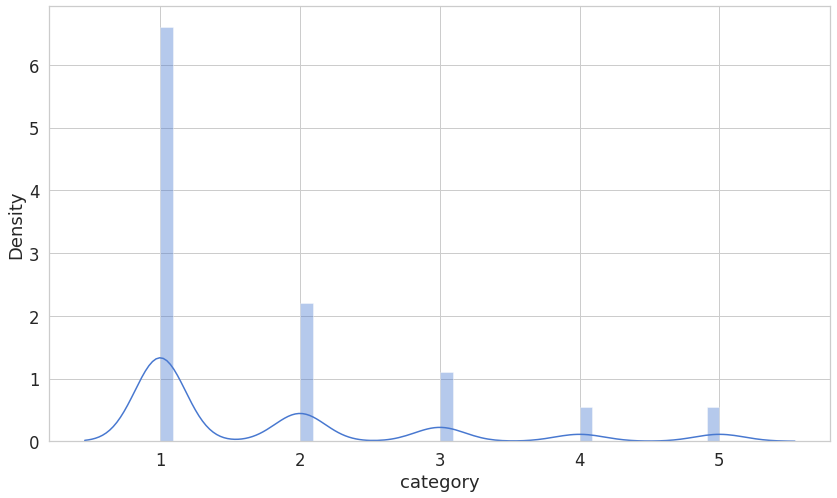

In [9]:
sns.distplot(train['category']);

In [10]:
train.shape

(10000, 2)

In [11]:
train['Domain'].value_counts()

noriomatsumoto.com              1
digitalmarketingbusiness.com    1
toneflex.com                    1
vocify.com                      1
custsupport.com                 1
                               ..
terraintegrationservices.com    1
livergea.com                    1
rawglowingskincare.com          1
bloggingking07.com              1
stemz.com                       1
Name: Domain, Length: 10000, dtype: int64

In [12]:
train['Domain'].value_counts(normalize=True)

noriomatsumoto.com              0.0001
digitalmarketingbusiness.com    0.0001
toneflex.com                    0.0001
vocify.com                      0.0001
custsupport.com                 0.0001
                                 ...  
terraintegrationservices.com    0.0001
livergea.com                    0.0001
rawglowingskincare.com          0.0001
bloggingking07.com              0.0001
stemz.com                       0.0001
Name: Domain, Length: 10000, dtype: float64

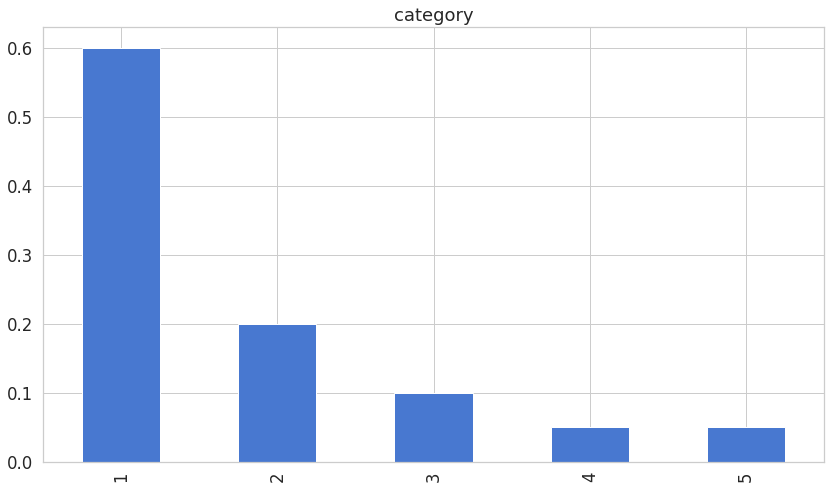

In [13]:
# train['Domain'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Domain')
# plt.show()
train['category'].value_counts(normalize=True).plot.bar(title='category')
plt.show()
# train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
# plt.show()
# train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
# plt.show()

In [14]:
genres = np.unique(train['Domain'])
genres

array(['006441.com', '00858722.com', '01018.com', ..., 'zzjs66.com',
       'zzz13.com', 'zzzz0011.com'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
genre_labels = gle.fit_transform(train['Domain'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
genre_mappings

{0: '006441.com',
 1: '00858722.com',
 2: '01018.com',
 3: '012256.com',
 4: '018236.com',
 5: '019704.com',
 6: '0207250.com',
 7: '0207m.com',
 8: '0218dr.com',
 9: '021mmm.com',
 10: '028mmt.com',
 11: '0295store.com',
 12: '030588.com',
 13: '0356dianqi.com',
 14: '0452hz.com',
 15: '0510vns.com',
 16: '0554zk.com',
 17: '0596art.com',
 18: '0620556.com',
 19: '062690.com',
 20: '069212.com',
 21: '0767933.com',
 22: '076961.com',
 23: '076xx.com',
 24: '07rryoviwc.com',
 25: '085464.com',
 26: '086767.com',
 27: '095181.com',
 28: '098533.com',
 29: '0oo0.com',
 30: '0v.com',
 31: '1001consejos.com',
 32: '100atms.com',
 33: '100c.com',
 34: '100mercaditos.com',
 35: '101shift.com',
 36: '1023ashebridge.com',
 37: '106bthepalisades.com',
 38: '10bestcreditcardsnofees.com',
 39: '10jerky.com',
 40: '10parklawn-201.com',
 41: '111tinting.com',
 42: '1177997.com',
 43: '1187525.com',
 44: '1201sanchez.com',
 45: '122qi.com',
 46: '1234fireworks.com',
 47: '123securelife.com',
 48: '1

In [33]:
# train['Domain_label'] = genre_labels
# train[['Domain','category','Domain_label']].iloc[1:7]

In [32]:
from numpy.random import RandomState
import pandas as pd

rng = RandomState()

train = train.sample(frac=0.7, random_state=rng)
test = train.loc[~train.index.isin(train.index)]

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 5481 to 5839
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Domain    7000 non-null   object
 1   category  7000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 164.1+ KB


In [19]:
# test.info()

In [20]:
genres = np.unique(train['Domain'])
genres

array(['006441.com', '01018.com', '012256.com', ..., 'zzap.com',
       'zzc727.com', 'zzz13.com'], dtype=object)

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support

In [22]:
train.describe()


,category
count,7000.000000
mean,1.739143
std,1.122557
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [ ]:
# df['DataFrame Column'] = df['DataFrame Column'].astype(int)


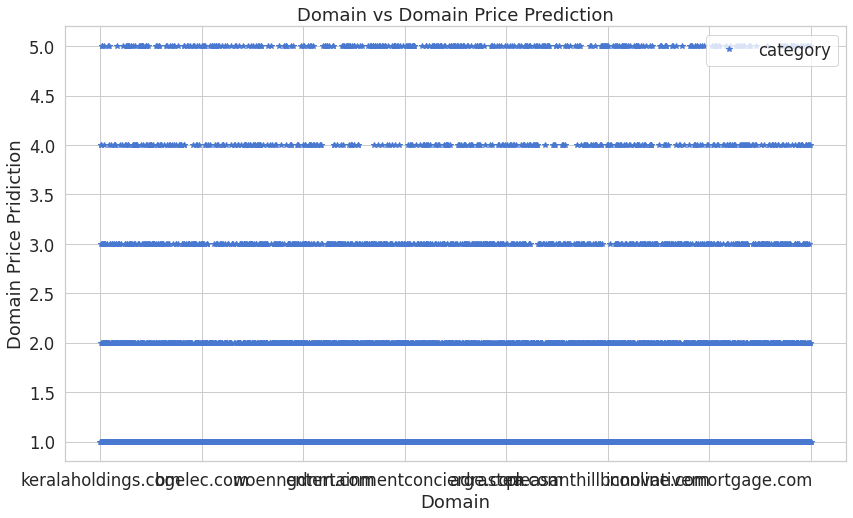

In [25]:
train.plot(x='Domain', y='category', style='*')
plt.title('Domain vs Domain Price Prediction')
plt.xlabel('Domain')
plt.ylabel('Domain Price Pridiction')
plt.show()

In [37]:
train['Domain'] = pd.to_numeric(train['Domain'],errors='coerce').isnull()


In [38]:
X = train.iloc[:, :-1].values
y = train.iloc[:, 1].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [41]:
lr = LinearRegression().fit(X_train, y_train)
get_cv_scores(lr)

CV Mean:  -0.0012807751148996792
STD:  0.001146976945354595




In [42]:
print(lr.intercept_)
print(lr.coef_)

1.7323979591836736
[0.]


In [43]:
y_pred = lr.predict(X_test)

In [44]:
X_train.shape

(3920, 1)

In [50]:
X_test.shape

(980, 1)

In [45]:
y_test.shape

(980,)

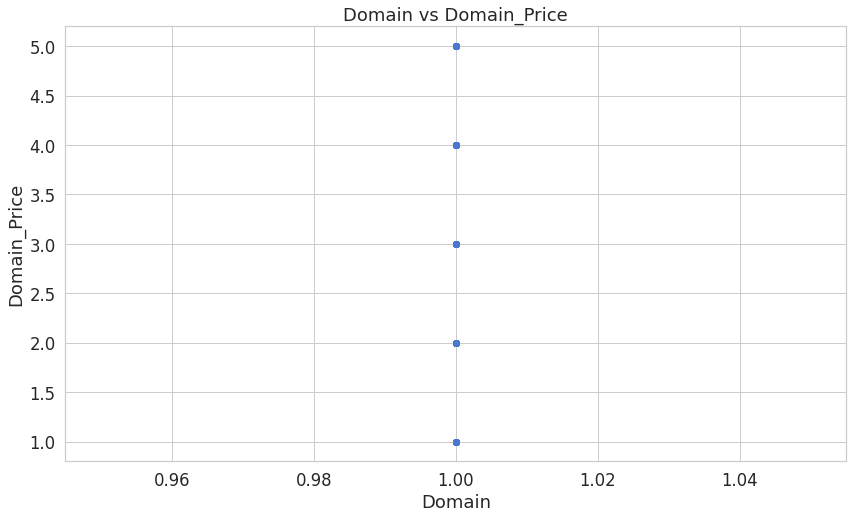

In [52]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Domain')
plt.ylabel('Domain_Price')
plt.title('Domain vs Domain_Price')
plt.show()

In [47]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,4,1.732398
1,1,1.732398
2,1,1.732398
3,1,1.732398
4,1,1.732398


In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9077759266972094
Mean Squared Error: 1.3321902983132026
Root Mean Squared Error: 1.154205483574395
